# Smart Budget Planner - Data Analysis

**Project:** November 2025 Data Science & Software Engineering Code Jam  
**Branch:** viktor-dev

## Project Overview

This notebook contains the data analysis for the **Smart Budget Planner** application. The goal is to analyze spending behavior across multiple users and create benchmark data that helps individuals compare their spending to population averages.

## Objectives

1. **Aggregate Spending by Category** - Clean and summarize transaction data
2. **Build Benchmarks** - Calculate average and median spending per category
3. **Compare Individual to Population** - Identify spending patterns and outliers
4. **Visualize Insights** - Create charts for user comparison
5. **Forecast Trends** - Predict future spending using regression

## Dataset

- **Source:** Kaggle Transactions Dataset
- **Size:** 7.4 million transactions
- **Time Period:** September - October 2024
- **Categories:** Healthcare, Restaurant, Entertainment, Retail, Travel, Gas, Grocery, Education

## Deliverables

- `benchmark_spending.json` - Average and median spending by category for SE team
- This Jupyter Notebook - Complete analysis with visualizations
- Written report - Findings and methodology

## Part 1: Data Loading & Exploration

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

pd.set_option('display.max_columns', None)

In [ ]:
# Add month/year columns for aggregation
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M')

print("Date columns added successfully!")
display(df_clean[['timestamp', 'year', 'month', 'year_month', 'merchant_category', 'amount']].head(10))

Date columns added successfully!


C:\Users\vikto\AppData\Local\Temp\ipykernel_55652\3213298964.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M')


,timestamp,year,month,year_month,merchant_category,amount
0,2024-09-30 00:00:01.034820+00:00,2024,9,2024-09,Restaurant,294.87
1,2024-09-30 00:00:01.764464+00:00,2024,9,2024-09,Entertainment,3368.97
2,2024-09-30 00:00:02.273762+00:00,2024,9,2024-09,Grocery,102582.38
3,2024-09-30 00:00:02.297466+00:00,2024,9,2024-09,Gas,630.60
4,2024-09-30 00:00:02.544063+00:00,2024,9,2024-09,Healthcare,724949.27
5,2024-09-30 00:00:03.050458+00:00,2024,9,2024-09,Education,11.76
6,2024-09-30 00:00:03.149440+00:00,2024,9,2024-09,Grocery,2606.19
7,2024-09-30 00:00:06.295911+00:00,2024,9,2024-09,Travel,828.33
8,2024-09-30 00:00:06.813965+00:00,2024,9,2024-09,Healthcare,104921.00
9,2024-09-30 00:00:07.105592+00:00,2024,9,2024-09,Retail,51521.84


In [20]:
df = pd.read_csv("../data.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst 5 rows:")
display(df.head())
print(f"\nData types:")
display(df.dtypes)
print(f"\nMissing values:")
display(df.isnull().sum())

Dataset shape: (7483766, 24)

Column names:
['transaction_id', 'customer_id', 'card_number', 'timestamp', 'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency', 'country', 'city', 'city_size', 'card_type', 'card_present', 'device', 'channel', 'device_fingerprint', 'ip_address', 'distance_from_home', 'high_risk_merchant', 'transaction_hour', 'weekend_transaction', 'velocity_last_hour', 'is_fraud']

First 5 rows:


,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True



Data types:


transaction_id          object
customer_id             object
card_number              int64
timestamp               object
merchant_category       object
merchant_type           object
merchant                object
amount                 float64
currency                object
country                 object
city                    object
city_size               object
card_type               object
card_present              bool
device                  object
channel                 object
device_fingerprint      object
ip_address              object
distance_from_home       int64
high_risk_merchant        bool
transaction_hour         int64
weekend_transaction       bool
velocity_last_hour      object
is_fraud                  bool
dtype: object


Missing values:


transaction_id         0
customer_id            0
card_number            0
timestamp              0
merchant_category      0
merchant_type          0
merchant               0
amount                 0
currency               0
country                0
city                   0
city_size              0
card_type              0
card_present           0
device                 0
channel                0
device_fingerprint     0
ip_address             0
distance_from_home     0
high_risk_merchant     0
transaction_hour       0
weekend_transaction    0
velocity_last_hour     0
is_fraud               0
dtype: int64

## Part 2: Data Cleaning & Preparation

In [21]:
print("Dataset Info:")
df.info()

print("Statistical Summary:")
display(df.describe())

print("Unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud          

,card_number,amount,distance_from_home,transaction_hour
count,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06
mean,4.222100e+15,4.792468e+04,3.220519e-01,1.215467e+01
std,2.341170e+15,1.775562e+05,4.672628e-01,6.536767e+00
min,3.700086e+14,1.000000e-02,0.000000e+00,0.000000e+00
25%,4.004400e+15,3.635300e+02,0.000000e+00,7.000000e+00
50%,5.010745e+15,1.177450e+03,0.000000e+00,1.200000e+01
75%,5.999914e+15,2.242953e+04,1.000000e+00,1.800000e+01
max,6.999728e+15,6.253153e+06,1.000000e+00,2.300000e+01


Unique values per column:
transaction_id: 7477306 unique values
customer_id: 4869 unique values
card_number: 5000 unique values
timestamp: 7483754 unique values
merchant_category: 8 unique values
merchant_type: 17 unique values
merchant: 105 unique values
amount: 2831167 unique values
currency: 11 unique values
country: 12 unique values
city: 11 unique values
city_size: 2 unique values
card_type: 5 unique values
card_present: 2 unique values
device: 9 unique values
channel: 3 unique values
device_fingerprint: 785462 unique values
ip_address: 7477187 unique values
distance_from_home: 2 unique values
high_risk_merchant: 2 unique values
transaction_hour: 24 unique values
weekend_transaction: 2 unique values
velocity_last_hour: 7483740 unique values
is_fraud: 2 unique values


In [27]:
# Convert timestamp to datetime with mixed format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', utc=True)

# Remove any rows with missing critical values
df_clean = df.dropna(subset=['amount', 'merchant_category']).copy()

# Ensure amount is numeric and positive
df_clean = df_clean[df_clean['amount'] > 0].copy()

print(f"Original rows: {len(df):,}")
print(f"After cleaning: {len(df_clean):,}")
print(f"Rows removed: {len(df) - len(df_clean):,}")

# Show the categories
print(f"\nCategories available:")
print(df_clean['merchant_category'].value_counts())

Original rows: 7,483,766
After cleaning: 7,483,766
Rows removed: 0

Categories available:
merchant_category
Healthcare       936770
Restaurant       936178
Entertainment    936173
Retail           935883
Travel           935790
Gas              935401
Grocery          934029
Education        933542
Name: count, dtype: int64


## Part 3: Aggregation

In [30]:
# Add month/year columns for aggregation
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M')

print("Date columns added successfully!")
display(df_clean[['timestamp', 'year', 'month', 'year_month', 'merchant_category', 'amount']].head(10))

Date columns added successfully!


C:\Users\vikto\AppData\Local\Temp\ipykernel_55652\3213298964.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M')


,timestamp,year,month,year_month,merchant_category,amount
0,2024-09-30 00:00:01.034820+00:00,2024,9,2024-09,Restaurant,294.87
1,2024-09-30 00:00:01.764464+00:00,2024,9,2024-09,Entertainment,3368.97
2,2024-09-30 00:00:02.273762+00:00,2024,9,2024-09,Grocery,102582.38
3,2024-09-30 00:00:02.297466+00:00,2024,9,2024-09,Gas,630.60
4,2024-09-30 00:00:02.544063+00:00,2024,9,2024-09,Healthcare,724949.27
5,2024-09-30 00:00:03.050458+00:00,2024,9,2024-09,Education,11.76
6,2024-09-30 00:00:03.149440+00:00,2024,9,2024-09,Grocery,2606.19
7,2024-09-30 00:00:06.295911+00:00,2024,9,2024-09,Travel,828.33
8,2024-09-30 00:00:06.813965+00:00,2024,9,2024-09,Healthcare,104921.00
9,2024-09-30 00:00:07.105592+00:00,2024,9,2024-09,Retail,51521.84


In [31]:
# Aggregate by category
category_totals = df_clean.groupby('merchant_category')['amount'].agg([
    ('total_spending', 'sum'),
    ('avg_spending', 'mean'),
    ('median_spending', 'median'),
    ('count', 'count')
]).round(2)

print("Spending by Category:")
display(category_totals.sort_values('total_spending', ascending=False))

Spending by Category:


,total_spending,avg_spending,median_spending,count
merchant_category,,,,
Travel,9.102762e+10,97273.55,1958.34,935790
Retail,5.660381e+10,60481.71,1344.18,935883
Gas,4.239336e+10,45321.06,1166.16,935401
Education,4.206480e+10,45059.35,1166.98,933542
Healthcare,4.204628e+10,44884.31,1153.30,936770
Grocery,3.310220e+10,35440.23,1022.47,934029
Entertainment,2.699065e+10,28830.84,796.94,936173
Restaurant,2.442841e+10,26093.76,685.75,936178


In [32]:
# Aggregate by month and category
monthly_category = df_clean.groupby(['year_month', 'merchant_category'])['amount'].sum().reset_index()
monthly_category.columns = ['month', 'category', 'total_amount']

print("Monthly spending by category:")
display(monthly_category.head(20))

Monthly spending by category:


,month,category,total_amount
0,2024-09,Education,1.365454e+09
1,2024-09,Entertainment,8.847384e+08
2,2024-09,Gas,1.381400e+09
3,2024-09,Grocery,1.072701e+09
4,2024-09,Healthcare,1.366582e+09
5,2024-09,Restaurant,7.881954e+08
6,2024-09,Retail,1.876147e+09
7,2024-09,Travel,2.863121e+09
8,2024-10,Education,4.069934e+10
9,2024-10,Entertainment,2.610591e+10


## Part 4: Build Benchmarks (JSON for SE Team)

In [33]:
# Cell 8: Calculate benchmarks (mean and median per category)
benchmarks = df_clean.groupby('merchant_category')['amount'].agg([('mean', 'mean'), ('median', 'median')]).round(2)

# Convert to dictionary for JSON
benchmark_dict = {'average_spending': benchmarks['mean'].to_dict(), 'median_spending': benchmarks['median'].to_dict()}

print("Benchmark Data:")
print(json.dumps(benchmark_dict, indent=2))

# Save to JSON file
with open('../benchmark_spending.json', 'w') as f:
    json.dump(benchmark_dict, f, indent=2)

print("\nSaved to benchmark_spending.json")

Benchmark Data:
{
  "average_spending": {
    "Education": 45059.35,
    "Entertainment": 28830.84,
    "Gas": 45321.06,
    "Grocery": 35440.23,
    "Healthcare": 44884.31,
    "Restaurant": 26093.76,
    "Retail": 60481.71,
    "Travel": 97273.55
  },
  "median_spending": {
    "Education": 1166.98,
    "Entertainment": 796.94,
    "Gas": 1166.16,
    "Grocery": 1022.47,
    "Healthcare": 1153.3,
    "Restaurant": 685.75,
    "Retail": 1344.18,
    "Travel": 1958.34
  }
}

Saved to benchmark_spending.json


## Part 5: Compare Individual User to Averages

In [34]:
# Select a random user for comparison
sample_user = df_clean['customer_id'].iloc[0]
print(f"Analyzing user: {sample_user}")

# Get user's spending by category
user_spending = df_clean[df_clean['customer_id'] == sample_user].groupby('merchant_category')['amount'].sum()

# Get average spending (from benchmarks)
avg_spending = benchmarks['mean']

# Create comparison dataframe
comparison = pd.DataFrame({
    'user_spending': user_spending,
    'average_spending': avg_spending,
    'difference': user_spending - avg_spending,
    'ratio': (user_spending / avg_spending).round(2)})

print("\nUser vs Average Spending:")
display(comparison.sort_values('user_spending', ascending=False))

# Identify outlier categories (spending > 1.5x average)
outliers = comparison[comparison['ratio'] > 1.5]
print(f"\nOutlier categories (spending > 1.5x average):")
display(outliers)

Analyzing user: CUST_72886

User vs Average Spending:


,user_spending,average_spending,difference,ratio
merchant_category,,,,
Retail,9112019.12,60481.71,9051537.41,150.66
Travel,8539116.10,97273.55,8441842.55,87.78
Gas,3714511.76,45321.06,3669190.70,81.96
Grocery,3159912.75,35440.23,3124472.52,89.16
Healthcare,3032876.26,44884.31,2987991.95,67.57
Education,2866290.24,45059.35,2821230.89,63.61
Entertainment,1575345.60,28830.84,1546514.76,54.64
Restaurant,1508561.36,26093.76,1482467.60,57.81



Outlier categories (spending > 1.5x average):


,user_spending,average_spending,difference,ratio
merchant_category,,,,
Education,2866290.24,45059.35,2821230.89,63.61
Entertainment,1575345.60,28830.84,1546514.76,54.64
Gas,3714511.76,45321.06,3669190.70,81.96
Grocery,3159912.75,35440.23,3124472.52,89.16
Healthcare,3032876.26,44884.31,2987991.95,67.57
Restaurant,1508561.36,26093.76,1482467.60,57.81
Retail,9112019.12,60481.71,9051537.41,150.66
Travel,8539116.10,97273.55,8441842.55,87.78


## Part 6: Visualizations

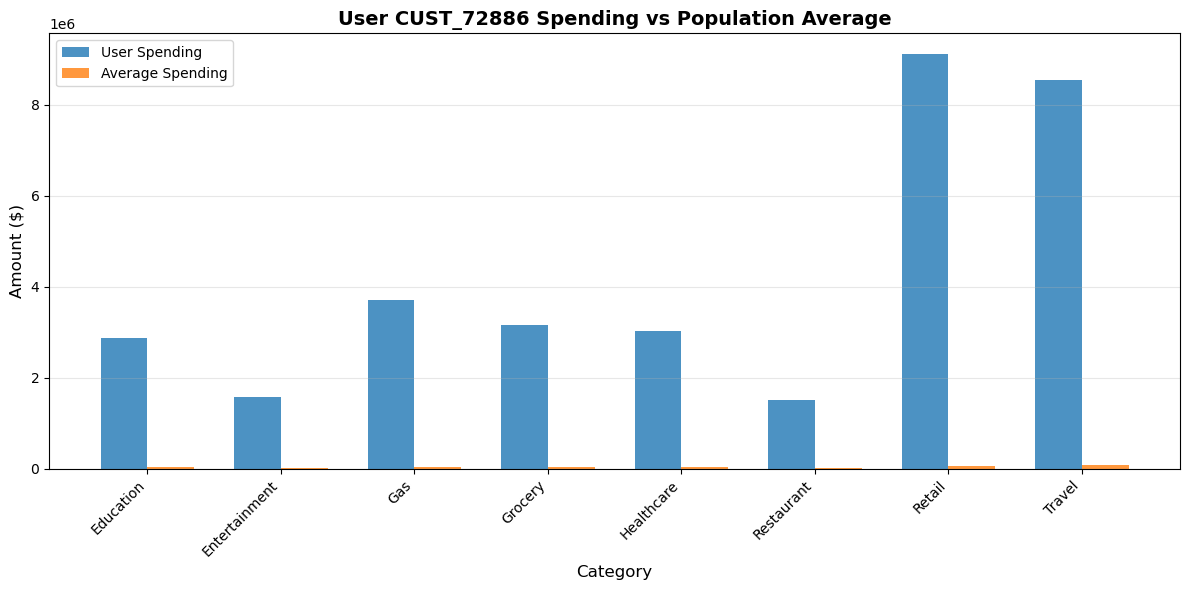

In [35]:
# Visualization 1 - Category Spending Comparison
plt.figure(figsize=(12, 6))

categories = comparison.index
x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, comparison['user_spending'], width, label='User Spending', alpha=0.8)
plt.bar(x + width/2, comparison['average_spending'], width, label='Average Spending', alpha=0.8)

plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.title(f'User {sample_user} Spending vs Population Average', fontsize=14, fontweight='bold')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

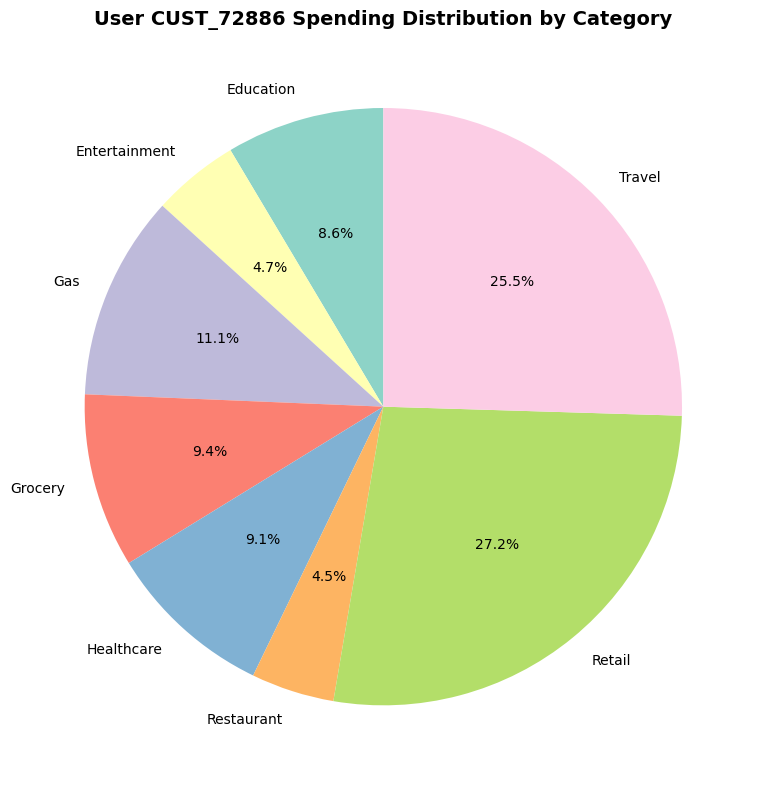

In [36]:
# Visualization 2 - Pie Chart of User Spending
plt.figure(figsize=(10, 8))

user_spending.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                   colors=plt.cm.Set3.colors)
plt.title(f'User {sample_user} Spending Distribution by Category', 
          fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

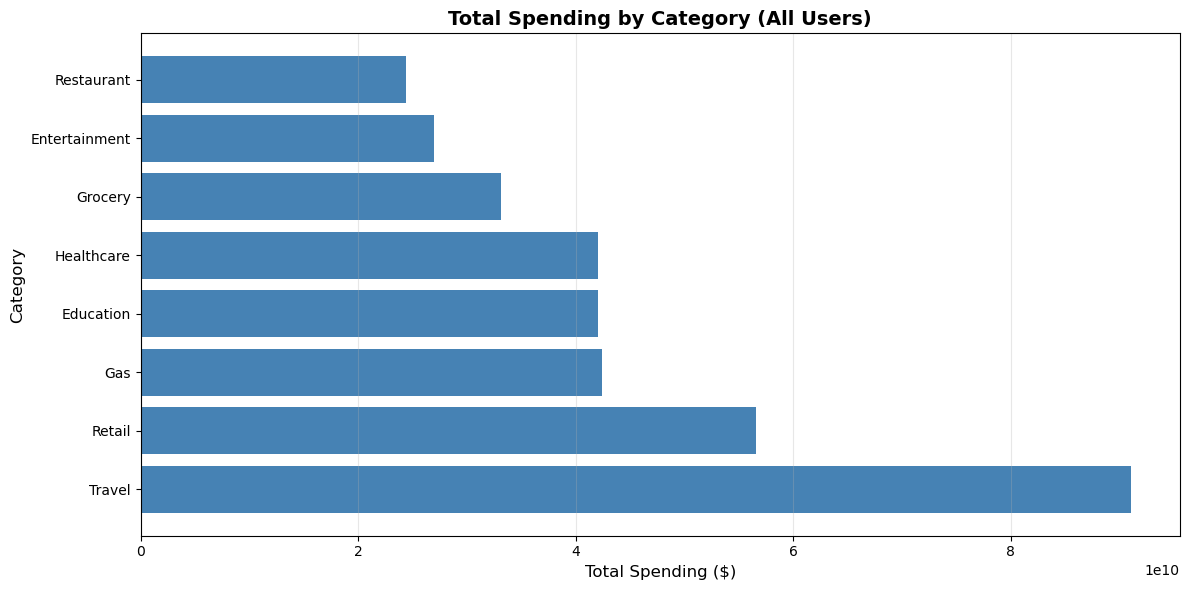

In [ ]:
#  Visualization 3 - Overall Category Spending
plt.figure(figsize=(12, 6))

category_totals_sorted = category_totals.sort_values('total_spending', ascending=False)
plt.barh(category_totals_sorted.index, category_totals_sorted['total_spending'], color='steelblue')

plt.xlabel('Total Spending ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Total Spending by Category (All Users)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()